In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
import autorootcwd
from tqdm import tqdm

import torch
import pandas as pd
import matplotlib.pyplot as plt 

from src.utils import chord_to_id_map, id_to_chord_map
from src.data.dataset import FullChordDataset
from src.utils import get_filenames, get_chord_annotation, chord_to_id

In [4]:
dataset = FullChordDataset()

all_labels = []

for i in tqdm(range(len(dataset))):
    labels = dataset[i][1]
    all_labels.extend(labels)

all_labels_chords = [id_to_chord_map[label.item()] for label in all_labels]
all_labels_series = pd.Series(all_labels_chords)

Using all filenames!


100%|██████████| 1213/1213 [00:18<00:00, 66.47it/s] 


In [7]:
# % of all chords that are X
print(all_labels_series[all_labels_series == 'X'].count() / len(all_labels_series))

0.07270857205484688


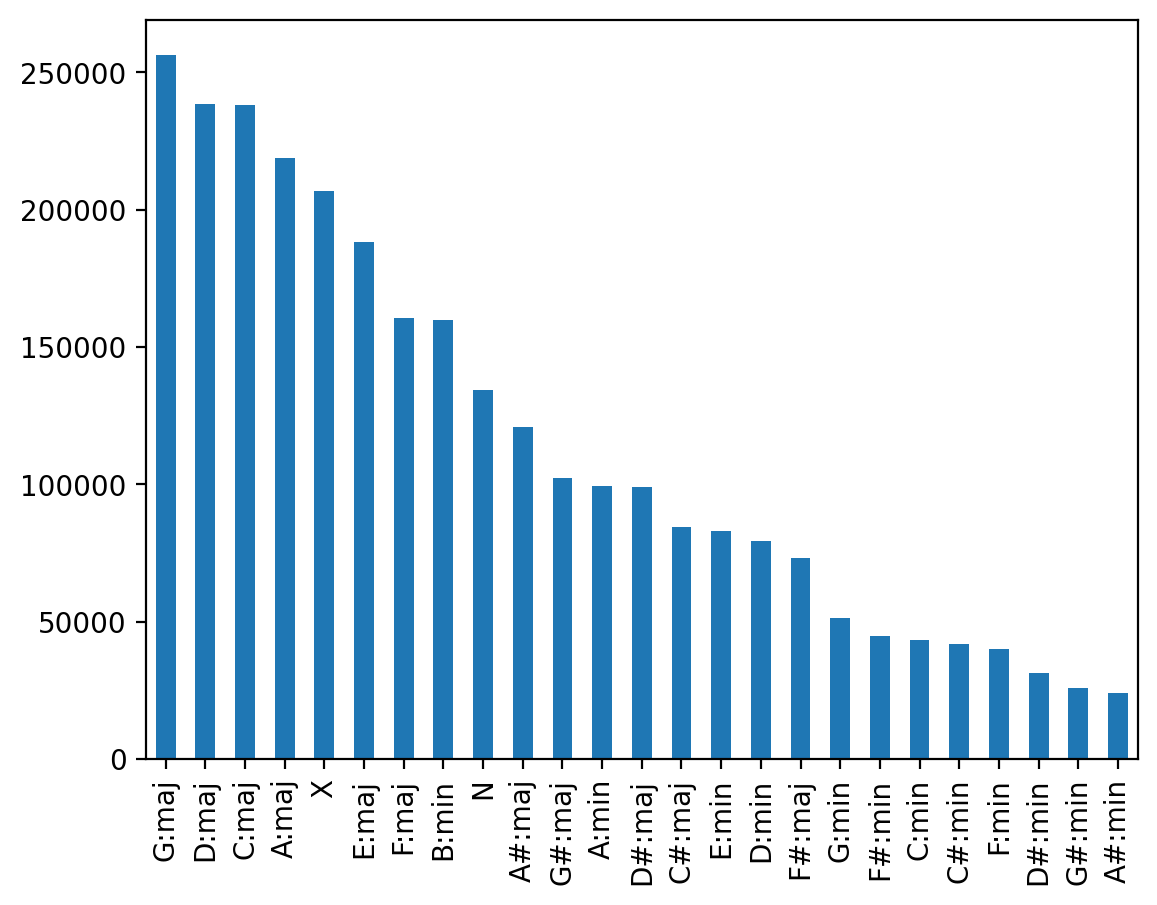

In [5]:
# Print label histogram
fig, ax = plt.subplots()
all_labels_series.value_counts().plot(kind='bar', ax=ax)
plt.show()

In [20]:
chord_counts = {}
chord_durations = {}

filenames = get_filenames()
for filename in tqdm(filenames):
    chords = get_chord_annotation(filename)
    for chord in chords:
        chord_id = chord_to_id(chord.value)
        chord_counts[chord_id] = chord_counts.get(chord_id, 0) + 1
        chord_durations[chord_id] = chord_durations.get(chord_id, 0) + chord.duration

# Rename ids to chords
chord_counts = {id_to_chord_map[k]: v for k, v in chord_counts.items()}
chord_counts = pd.Series(chord_counts).sort_values(ascending=False)
chord_durations = {id_to_chord_map[k]: v for k, v in chord_durations.items()}
chord_durations = pd.Series(chord_durations).sort_values(ascending=False)

100%|██████████| 1213/1213 [04:12<00:00,  4.80it/s]


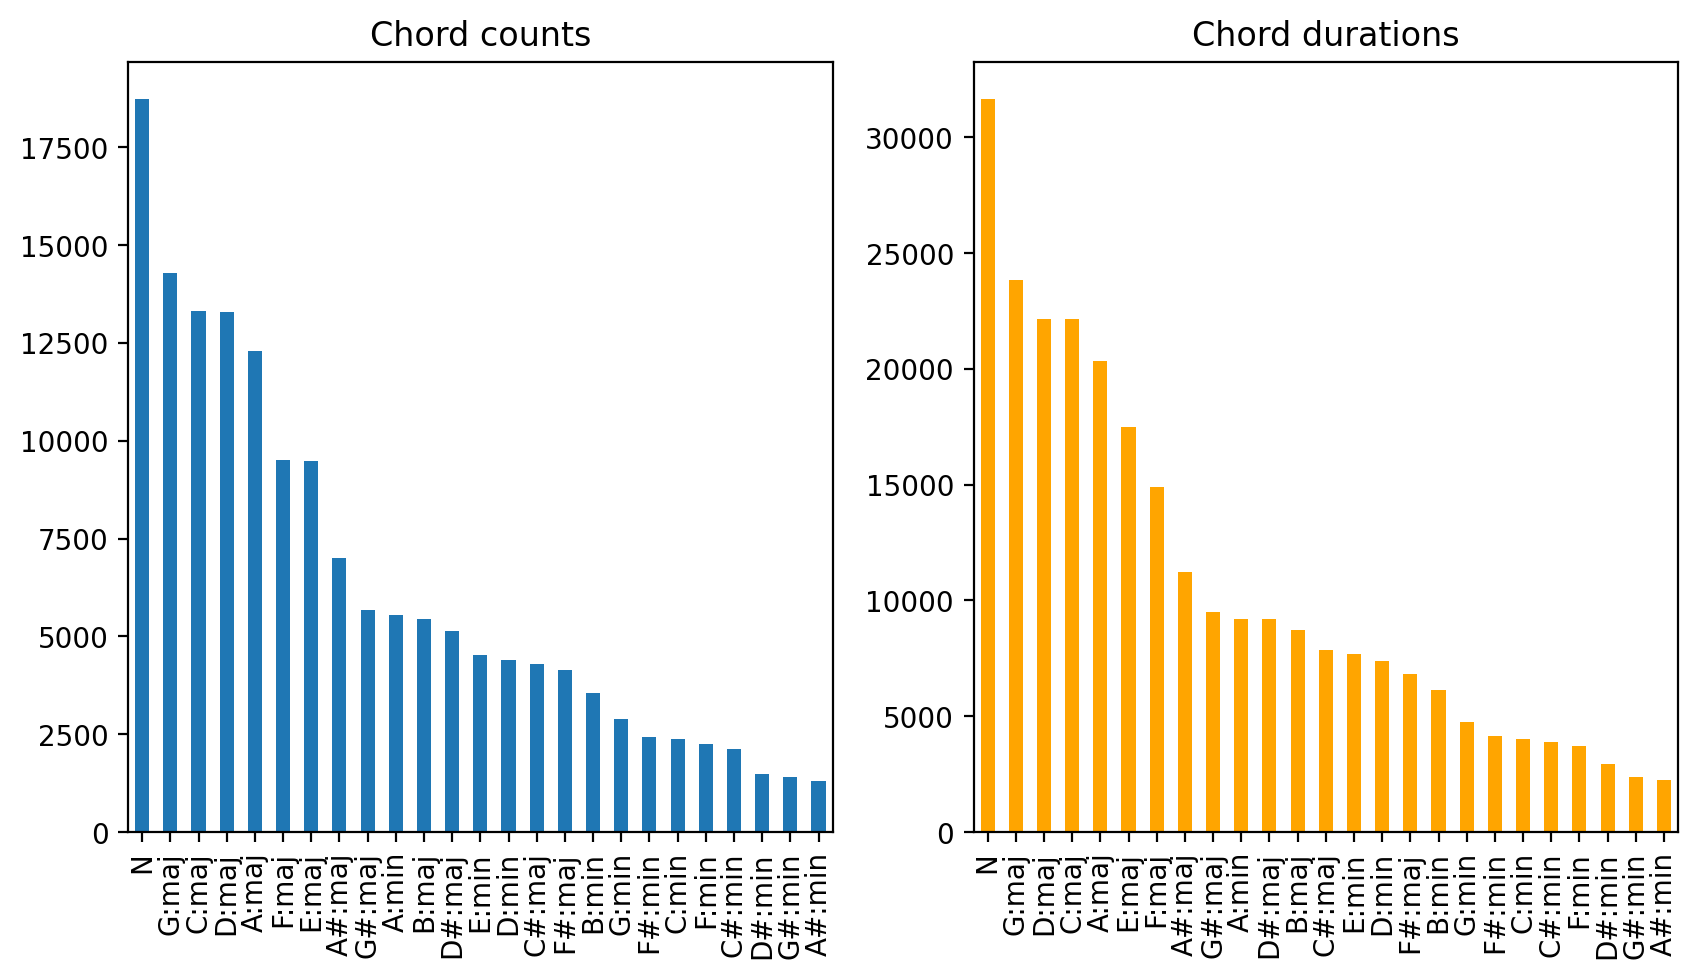

In [22]:
# Plot chord counts and durations
fig, ax = plt.subplots(1,2, figsize=(10, 5))
chord_counts.plot(kind='bar', ax=ax[0], title='Chord counts')
chord_durations.plot(kind='bar', ax=ax[1], color='orange', title='Chord durations')
plt.show()